## Dataset: Heart Disease 
#### 目標: 猜測是否有心臟疾病
#### 特徵清單: 
10. age: continuous
11. sex: categorical, 2 values {0: female, 1: male}
12. cp (chest pain type): categorical, 4 values
    {1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
13. restbp (resting blood pressure on admission to hospital): continuous (mmHg)
14. chol (serum cholesterol level): continuous (mg/dl)
15. fbs (fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}
16. restecg (resting electrocardiography): categorical, 3 values
    {0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
17. thalach (maximum heart rate achieved): continuous
18. exang (exercise induced angina): categorical, 2 values {0: no, 1: yes}
19. oldpeak (ST depression induced by exercise relative to rest): continuous
20. slope (slope of peak exercise ST segment): categorical, 3 values 
    {1: upsloping, 2: flat, 3: downsloping}
21. ca (number of major vessels colored by fluoroscopy): discrete (0,1,2,3)
22. thal: categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect}
23. num (diagnosis of heart disease): categorical, 5 values 
    {0: less than 50% narrowing in any major vessel, 
    1-4: more than 50% narrowing in 1-4 vessels}

<center style="color:blue;font-size:30px;font-family:Microsoft JhengHei"> 跟著做1開頭</center>

# <center > Load Data </center>

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('cleveland.dat', header=None, sep=', ', engine='python')
# columns setting
df.columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
              "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]


for i in range(1,5):
    df['num'] = df['num'].replace(i,1)

df.head() #show出前五筆資料

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


# <center> Data Explore </center>

In [8]:
#欄位的各個統計值
df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


<br>
<center style="color:blue;font-size:25px;font-family:Microsoft JhengHei"> 改改看畫age與chol </center>

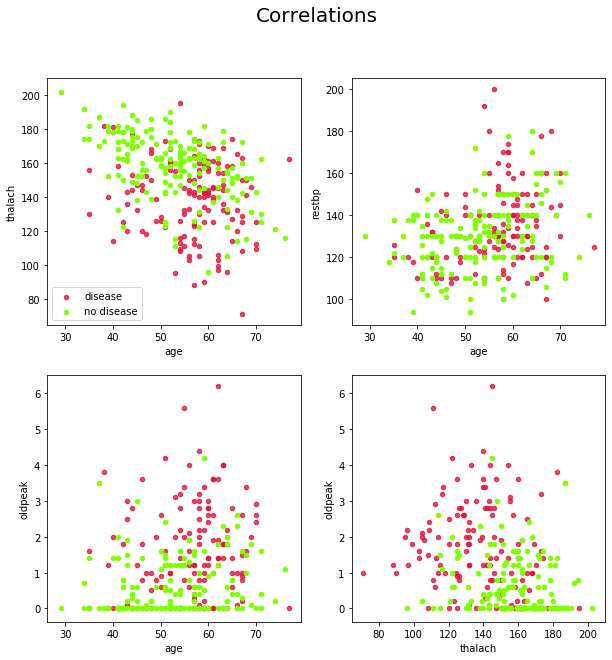

In [9]:
fig, axes = plt.subplots( nrows=2, ncols=2, figsize=(10,10) )
plt.suptitle("Correlations", fontsize=20)
axes[0,0].scatter(df[df.num==1].age,df[df.num==1].thalach,color=["crimson"],s=20,alpha=0.8,label="disease")
axes[0,0].scatter(df[df.num==0].age,df[df.num==0].thalach,color=["chartreuse"],s=20,label="no disease")
axes[0,0].set_xlabel("age")
axes[0,0].set_ylabel("thalach")
axes[0,0].legend(prop={'size': 10},loc="lower left") #圖例setting

axes[0,1].scatter(df[df.num==1].age,df[df.num==1].restbp,color=["crimson"],s=20,alpha=0.8,label="disease")
axes[0,1].scatter(df[df.num==0].age,df[df.num==0].restbp,color=["chartreuse"],s=20,label="no disease")
axes[0,1].set_xlabel("age")
axes[0,1].set_ylabel("restbp")

axes[1,0].scatter(df[df.num==1].age,df[df.num==1].oldpeak,color=["crimson"],s=20,alpha=0.8,label="disease")
axes[1,0].scatter(df[df.num==0].age,df[df.num==0].oldpeak,color=["chartreuse"],s=20,label="no disease")
axes[1,0].set_xlabel("age")
axes[1,0].set_ylabel("oldpeak")

axes[1,1].scatter(df[df.num==1].thalach,df[df.num==1].oldpeak,color=["crimson"],s=20,alpha=0.8,label="disease")
axes[1,1].scatter(df[df.num==0].thalach,df[df.num==0].oldpeak,color=["chartreuse"],s=20,label="no disease")
axes[1,1].set_xlabel("thalach")
axes[1,1].set_ylabel("oldpeak")

plt.show()

# <center> Data Preprocessing </center>

<center style="color:blue;font-size:30px;font-family:Microsoft JhengHei"> 跟著做2開頭 </center>


## 處理異常值

In [10]:
#觀察每個欄位的型態(發現thal, ca有異常值)
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
num          int64
dtype: object

In [11]:
for i in range(len(df['ca'].tolist())):
    val = df['ca'][i]
    if (val != '0.0') and (val != '1.0') and (val != '2.0') and (val != '3.0'):
        print(val," index:", i)

?  index: 154
?  index: 177
?  index: 261
?  index: 272


In [12]:
for i in range(len(df['thal'].tolist())):
    val = df['thal'][i]
    if (val != '3.0') and (val != '6.0') and (val != '7.0'):
        print(val," index:", i)

?  index: 81
?  index: 244


In [13]:
df.iloc[154:155]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
154,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0


In [14]:
df = df.replace('?', np.nan)
df.iloc[154:155]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
154,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0


## 處理 missing vale 


In [15]:
#針對num欄位觀察其他欄位數量 
df.groupby('num').count()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
num,,,,,,,,,,,,,
0,164,164,164,164,164,164,164,164,164,164,164,161,163
1,139,139,139,139,139,139,139,139,139,139,139,138,138


In [16]:
#針對 ca欄位檢查缺失值
df[df['ca'].isnull()]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
154,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
177,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
261,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
272,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


#### 方法1 : 丟掉該筆資料

In [17]:
# drop missing values
df_drop = df.dropna()

In [18]:
print('before drop, data size: ',len(df))
print('after drop, data size: ',len(df_drop))

before drop, data size:  303
after drop, data size:  297


#### 方法2 : 補缺值 (利用Imputer)
(1)用mean值代替
(2)用median代替
(3)用most_frequent代替


In [19]:
from sklearn.preprocessing import Imputer
#df_impute.info()
imr = Imputer(missing_values='NaN', strategy='most_frequent', axis=0) #strategy可以替換成mean或是median
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)

df_impute = pd.DataFrame(imputed_data)
df_impute.columns = df.columns

df_impute.info()
#針對num欄位觀察其他欄位數量
df_impute.groupby('num').count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age        303 non-null float64
sex        303 non-null float64
cp         303 non-null float64
restbp     303 non-null float64
chol       303 non-null float64
fbs        303 non-null float64
restecg    303 non-null float64
thalach    303 non-null float64
exang      303 non-null float64
oldpeak    303 non-null float64
slope      303 non-null float64
ca         303 non-null float64
thal       303 non-null float64
num        303 non-null float64
dtypes: float64(14)
memory usage: 33.2 KB


//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
num,,,,,,,,,,,,,
0.0,164,164,164,164,164,164,164,164,164,164,164,164,164
1.0,139,139,139,139,139,139,139,139,139,139,139,139,139


## 類別型資料做 one-hot encoding 

In [20]:
#將類別型資料轉換為string型態(for get_dummies)
for cat_feature in ['sex','cp','fbs','restecg','exang','slope','ca','thal']:
    df_impute[cat_feature] = df_impute[cat_feature].astype(str)
    df_drop[cat_feature] = df_drop[cat_feature].astype(str)
# one-hot encoding
df_preprocessed = pd.get_dummies(df_impute)
df_preprocessed.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,age,restbp,chol,thalach,oldpeak,num,sex_0.0,sex_1.0,cp_1.0,cp_2.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0.0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,286.0,108.0,1.5,1.0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,37.0,130.0,250.0,187.0,3.5,0.0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
3,41.0,130.0,204.0,172.0,1.4,0.0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
4,56.0,120.0,236.0,178.0,0.8,0.0,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0


<center style="color:blue;font-size:30px;font-family:Microsoft JhengHei"> 跟著做3開頭 </center>
<br>
<center style="color:blue;font-size:25px;font-family:Microsoft JhengHei"> 改改看 test_size </center>

## 資料集切割
#### 分成training data和 testing data

In [21]:
from sklearn.model_selection import train_test_split

X=df_preprocessed.drop('num', axis=1).values
Y=df_preprocessed['num'].values

#get training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print('training data size:', len(X_train))
print('testing data size:', len(X_test))

#get features list
features = np.array(df_preprocessed.columns)
features = np.delete(features, np.where(features=='num')[0][0])
features = features.tolist()

training data size: 242
testing data size: 61


## 資料標準化

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std

array([[-0.75635158, -0.10203197, -0.04491364, ...,  0.882843  ,
        -0.26607604, -0.76948376],
       [ 0.21782568,  0.01123288, -0.77983499, ..., -1.13270423,
        -0.26607604,  1.29957258],
       [ 0.43430951,  2.16326508,  1.52162924, ..., -1.13270423,
        -0.26607604,  1.29957258],
       ...,
       [-0.10690007, -1.2346805 , -0.16095385, ..., -1.13270423,
        -0.26607604,  1.29957258],
       [ 1.08376101, -0.66835624, -1.36003605, ..., -1.13270423,
        -0.26607604,  1.29957258],
       [ 1.19200293,  1.59694082, -0.0255736 , ..., -1.13270423,
         3.75832409, -0.76948376]])

# <center> Classification </center>


<center style="color:blue;font-size:30px;font-family:Microsoft JhengHei"> 跟著做4開頭 </center>
<br>
<center style="color:blue;font-size:25px;font-family:Microsoft JhengHei"> 改改看max_depth</center>

## Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

#train tree model
tree = DecisionTreeClassifier(criterion='gini',max_depth=4)
tree.fit(X_train_std,y_train)

#predict
y_pred_decision = tree.predict(X_test_std)
y_predprob_decision = tree.predict_proba(X_test_std)
y_predprob_po_decision = y_predprob_decision[:,1]
print('Decision tree testing result:',y_pred_decision)
print('Decision tree testing prob:', y_predprob_po_decision)
print('Misclassified samples: %d' % (y_test != y_pred_decision).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_decision))

Decision tree testing result: [0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1.]
Decision tree testing prob: [0.10526316 0.         0.9787234  0.10526316 0.26923077 1.
 0.         0.75       0.13043478 1.         0.75       0.
 0.         0.26923077 0.10526316 0.13043478 0.26923077 0.75
 0.         0.9787234  0.9787234  0.         0.         0.
 0.         1.         0.10526316 0.9787234  0.         0.
 0.26923077 0.9787234  0.9787234  1.         0.         0.
 0.13043478 0.         1.         0.42857143 0.75       0.
 0.10526316 0.6        0.9787234  0.9787234  0.75       0.42857143
 0.42857143 0.9787234  0.         0.6        0.         0.26923077
 0.         0.9787234  0.9787234  0.42857143 1.         0.10526316
 0.9787234 ]
Misclassified samples: 13
Accuracy: 0.7869


<center style="color:blue;font-size:30px;font-family:Microsoft JhengHei"> 跟著做5開頭 </center>

## linear SVM

In [24]:
from sklearn.svm import SVC

#train model
svm_linear = SVC(kernel='linear', random_state=0, probability=True) 
svm_linear.fit(X_train_std, y_train) # 餵入training data，並訓練出分類器'svm_linear'

#predict
y_pred_linear = svm_linear.predict(X_test_std) #testing data餵入分類器'svm_linear'，得到每筆的預測結果'y_pred'
y_predprob_linear = svm_linear.predict_proba(X_test_std)
y_predprob_po_linear =  y_predprob_linear[:,1]
print('Linear SVM testing result:',y_pred_linear)
print('Linear SVM testing prob:', y_predprob_po_linear)
print('Misclassified samples: %d' % (y_test != y_pred_linear).sum()) 
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_linear)) #評估正確性

Linear SVM testing result: [0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.]
Linear SVM testing prob: [0.37305713 0.24294179 0.74688697 0.26184197 0.59125278 0.50885471
 0.0716344  0.93482452 0.46588325 0.5268157  0.94507917 0.07211191
 0.15473651 0.26933395 0.30514189 0.06170055 0.23365513 0.89612767
 0.06423759 0.84962625 0.95587383 0.3441784  0.56389543 0.12935685
 0.06632049 0.80130316 0.39218882 0.89395079 0.07786027 0.41717728
 0.61119223 0.94069486 0.93118284 0.86120625 0.12162292 0.07382544
 0.04230384 0.06101757 0.15105073 0.64744608 0.78097106 0.0485342
 0.25431217 0.12232731 0.88451858 0.74463615 0.9753381  0.3499474
 0.46206264 0.86954856 0.17556252 0.22331774 0.21825361 0.3337392
 0.07951758 0.85018294 0.89995881 0.56589445 0.84140335 0.23106621
 0.90749721]
Misclassified samples: 5
Accuracy: 0.9180


## RBF SVM

In [25]:
from sklearn.svm import SVC
#train rbf model
svm_rbf = SVC(kernel='rbf' ,C=2 ,random_state=0, probability=True) 
svm_rbf.fit(X_train_std, y_train)

#predict
y_pred_rbf = svm_rbf.predict(X_test_std)
y_predprob_rbf = svm_rbf.predict_proba(X_test_std)
y_predprob_po_rbf =  y_predprob_rbf[:,1]
print('RBF SVM testing result:',y_pred_rbf)
print('RBF SVM testing prob:',y_predprob_po_rbf)
print('Misclassified samples: %d' % (y_test != y_pred_rbf).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_rbf))


RBF SVM testing result: [0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.]
RBF SVM testing prob: [0.37468156 0.31013714 0.80531763 0.21877712 0.722229   0.60340742
 0.05839594 0.87093463 0.5960973  0.75140191 0.79788461 0.04920158
 0.10022622 0.21328977 0.18666372 0.08300759 0.21752073 0.84349844
 0.05021659 0.87163831 0.9652219  0.50992317 0.71203426 0.07432269
 0.05796544 0.80256533 0.25448551 0.90884113 0.06702137 0.52668523
 0.45016034 0.91823662 0.83369329 0.76279836 0.10345601 0.05177528
 0.10075994 0.0773409  0.11567578 0.54108159 0.45553488 0.0680455
 0.17701025 0.14557792 0.89099453 0.90308923 0.73838351 0.41774181
 0.52444234 0.95432555 0.10809211 0.08170664 0.13281886 0.4824682
 0.0654577  0.8493772  0.91973486 0.89109749 0.80810539 0.14261715
 0.94193109]
Misclassified samples: 6
Accuracy: 0.9016


# Exercise1: 
1. 試著改用未標準化的data 做 RBF SVM
2. 並畫roc curve比較標準化前後

In [29]:
from sklearn.svm import SVC
#train rbf model
svm_rbf = SVC(kernel='rbf' ,C=2 ,random_state=0, probability=True) 
svm_rbf.fit(X_train, y_train)

#predict
y_pred_rbf = svm_rbf.predict(X_test)
y_predprob_rbf = svm_rbf.predict_proba(X_test)
y_predprob_po_rbf =  y_predprob_rbf[:,1]
print('RBF SVM testing result:',y_pred_rbf)
print('RBF SVM testing prob:',y_predprob_po_rbf)
print('Misclassified samples: %d' % (y_test != y_pred_rbf).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_rbf))


RBF SVM testing result: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
RBF SVM testing prob: [0.44130409 0.40533104 0.42635501 0.44098382 0.360194   0.57790776
 0.41339521 0.44124804 0.33690463 0.43037818 0.44121562 0.44130257
 0.3185047  0.43259963 0.34825459 0.44087533 0.44071821 0.44147261
 0.42953303 0.48730848 0.53382338 0.44130409 0.41717566 0.44138464
 0.42759588 0.44716376 0.41453143 0.44130409 0.44659482 0.45396146
 0.44049574 0.44130759 0.4413146  0.41209006 0.44163187 0.37101802
 0.44348684 0.44154504 0.44052523 0.42092538 0.44114394 0.46303506
 0.44127429 0.44130629 0.52809391 0.44049381 0.44130409 0.43945635
 0.44052347 0.59647765 0.44465186 0.43020527 0.44129894 0.56260944
 0.37514223 0.4411382  0.44550438 0.44178439 0.44135297 0.44022453
 0.43700901]
Misclassified samples: 28
Accuracy: 0.5410


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<center style="color:blue;font-size:30px;font-family:Microsoft JhengHei"> 跟著做6開頭 </center>


# <center> Cross Validation </center>

### linear SVM

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
#train model
svm_linear = SVC(kernel='linear', C=2) 
svm_linear.fit(X_train_std, y_train) 

#predict
y_pred = svm_linear.predict(X_test_std) 
print('testing result:',y_pred)
print('Misclassified samples: %d' % (y_test != y_pred).sum()) 
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

print('\n==============================cross validation===========================================')
from sklearn.model_selection import cross_val_score
X_std = np.concatenate((X_train_std, X_test_std), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

svm_linear = SVC(kernel='linear', C=2)
#cv:切割為cv份
scores = cross_val_score(svm_linear, X_std, y, cv=5)
print("Cross Validation every accuracy: ",scores)
print("(Cross Validation)Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()*2))

testing result: [0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.]
Misclassified samples: 5
Accuracy: 0.9180

==============================cross validation===========================================
Cross Validation every accuracy:  [0.85245902 0.80327869 0.81967213 0.7704918  0.91525424]
(Cross Validation)Accuracy: 0.8322 (+/- 0.0984)


# Exersice2 : 10 fold cross validation on decision tree

<center style="color:blue;font-size:30px;font-family:Microsoft JhengHei"> 跟著做7開頭 </center>
<br>
<center style="color:blue;font-size:20px;font-family:Microsoft JhengHei"> 改改看 n_neighbors~ </center>

### KNN
- [sklearn的KNN參數參考](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
```python
# n_neighbors : Number of neighbors to use by default for k_neighbors queries.
# p : Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.
# n_jobs : The number of parallel jobs to run for neighbors search
```

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, p = 2)
knn.fit(X_train_std,y_train)
y_pred_knn = knn.predict(X_test_std)
y_predprob_knn = knn.predict_proba(X_test_std)
y_predprob_po_knn = y_predprob_knn[:,1]
print("Misclassified sample: %d" % (y_test != y_pred_knn).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_knn))

Misclassified sample: 12
Accuracy: 0.8033


<center style="color:blue;font-size:30px;font-family:Microsoft JhengHei"> 跟著做8開頭 </center>
<br>
<center style="color:blue;font-size:20px;font-family:Microsoft JhengHei"> 改改看 n_estimators~ </center>

## RandomForest
- [sklearn的RandomForest參數參考](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
)
```python
# criterion : impurity function
# n_estimators :  number of decision trees
# random_state : seed used by the random number generator
# n_jobs : number of cores for parallelism
```

In [31]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', n_estimators=20,random_state=1)
forest.fit(X_train_std,y_train)
y_pred_forest = forest.predict(X_test_std)
y_predprob_forest = forest.predict_proba(X_test_std)
y_predprob_po_forest = y_predprob_forest[:,1] 
print("Misclassified sample: %d" % (y_test != y_pred_forest).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_forest))

Misclassified sample: 6
Accuracy: 0.9016


## Adaboost
- [sklearn的Adaboost參數參考](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
)


In [32]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(n_estimators=10,random_state=0)
AdaBoost.fit(X_train_std,y_train)
y_pred_ada = AdaBoost.predict(X_test_std)
y_predprob_ada = AdaBoost.predict_proba(X_test_std)
y_predprob_po_ada = y_predprob_ada[:,1]
print("Misclassified sample: %d" % (y_test != y_pred_ada).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_ada))

Misclassified sample: 11
Accuracy: 0.8197


In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=30, learning_rate=0.1, max_depth=3, random_state=0)
gbc.fit(X_train_std,y_train)
y_pred_gbc = gbc.predict(X_test_std)
y_predprob_gbc = gbc.predict_proba(X_test_std)
print("Misclassified sample: %d" % (y_test != y_pred_gbc).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_gbc))

Misclassified sample: 7
Accuracy: 0.8852


<center style="color:blue;font-size:30px;font-family:Microsoft JhengHei"> 跟著做9開頭 </center>

# <center> Feature Selection </center>

### linear svm係數可作為feature重要性的指標

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

#train svmliner model
svm_linear = SVC(kernel='linear',C=2, random_state=0) 
svm_linear.fit(X_train_std, y_train) # 餵入training data，並訓練出分類器'svm_linear'

#predict
y_pred = svm_linear.predict(X_test_std) #testing data餵入分類器'svm_linear'，得到每筆的預測結果'y_pred'
print('Linear SVM testing result:',y_pred)
print('Misclassified samples: %d' % (y_test != y_pred).sum()) 
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred)) #評估正確性


# complete X_std, y
X_std = np.concatenate((X_train_std, X_test_std),axis=0)
y = np.concatenate((y_train, y_test),axis=0)

#cross validation
svm_cross = SVC(kernel='linear',C=2) 
scores = cross_val_score(svm_cross ,X_std ,y ,cv=5)
print("Cross Validation result scores",scores)
print("(Cross Validation) Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

print('\n==============================feature selection============================================================')
#import features
coef = svm_linear.coef_[0]#對應每個feature的重要係數
coef = np.absolute(coef)
svm_indices = np.argsort(coef)[::-1]

print('Importance of features:')
for f in range(20):
    print(("%4d) %-*s %f" % (f+1 ,30 ,features[svm_indices[f]],coef[svm_indices[f]])))

# 取前 17 個feature
X_train_RD = np.array(X_train_std[:,svm_indices[0]])
X_test_RD = np.array(X_test_std[:,svm_indices[0]])
for i in svm_indices[0:17]:
    X_train_RD = np.vstack([X_train_RD,X_train_std[:,i]]) 
    X_test_RD = np.vstack([X_test_RD,X_test_std[:,i]])
X_train_RD = X_train_RD.T
X_test_RD = X_test_RD.T

#train model after feature select
linear_svm_select = SVC(kernel='linear',C=2 ,random_state=0)
linear_svm_select.fit(X_train_RD,y_train)

#predict
y_pred = linear_svm_select.predict(X_test_RD)
print('After feature select')
print('Linear SVM testing result:',y_pred)
print('Misclassified samples: %d' % (y_test != y_pred).sum()) 
print('(After feature select) Accuracy: %.4f' % accuracy_score(y_test, y_pred)) #評估正確性

X_std_select = np.concatenate((X_train_RD, X_test_RD),axis=0)
y = np.concatenate((y_train, y_test),axis=0)

svm_cross = SVC(kernel='linear' ,C=2) 
scores = cross_val_score(svm_cross, X_std_select, y, cv=5)
print("Cross Validation result scores",scores)
print("(After feature select)(Cross Validation) Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Linear SVM testing result: [0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.]
Misclassified samples: 5
Accuracy: 0.9180
Cross Validation result scores [0.85245902 0.80327869 0.81967213 0.7704918  0.91525424]
(Cross Validation) Accuracy: 0.8322 (+/- 0.0984)

==============================feature selection============================================================
Importance of features:
   1) oldpeak                        0.480484
   2) ca_0.0                         0.449613
   3) cp_4.0                         0.396549
   4) cp_1.0                         0.301686
   5) cp_3.0                         0.300530
   6) ca_2.0                         0.281088
   7) restbp                         0.266998
   8) thal_7.0                       0.244052
   9) age                            0.204182
  10) thal_3.0                       0.203957
  11) sex_0.0 

### Decision Tree : feature importances

In [3]:
from sklearn.tree import DecisionTreeClassifier
#train tree model
tree = DecisionTreeClassifier(criterion='gini',max_depth=4)
tree.fit(X_train_std,y_train)
#predict
y_pred = tree.predict(X_test_std)
print('Decision tree testing result:',y_pred)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

from sklearn.model_selection import cross_val_score
X_std = np.concatenate((X_train_std, X_test_std), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
tree_cross = DecisionTreeClassifier(criterion='gini',max_depth=4)
#cv:切割為cv份
scores = cross_val_score(tree_cross, X_std, y, cv = 5)
print("Cross Validation every accuracy: ",scores)
print("(Cross Validation)Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()*2))

print('\n==============================feature selection============================================================')
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(10):
    print(("%4d) %-*s %f" % (f+1,30,features[indices[f]],importances[indices[f]])))

#取前5個features
X_train_RD = np.array(X_train_std[:,indices[0]])
X_test_RD = np.array(X_test_std[:,indices[0]])
for i in indices[0:5]:
    X_train_RD = np.vstack([X_train_RD,X_train_std[:,i]]) 
    X_test_RD = np.vstack([X_test_RD,X_test_std[:,i]]) 
X_train_RD = X_train_RD.T
X_test_RD = X_test_RD.T

#train tree model
tree_select = DecisionTreeClassifier(criterion='gini',max_depth=4)
tree_select.fit(X_train_RD,y_train)

#predict
y_pred = tree_select.predict(X_test_RD)
print('Decision tree testing result:',y_pred)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

#cross validation
X_std_select = np.concatenate((X_train_RD, X_test_RD),axis=0)
y = np.concatenate((y_train, y_test),axis=0)

tree_cross = DecisionTreeClassifier(criterion='gini',max_depth=4)
#cv:切割為cv份
scores = cross_val_score(tree_cross, X_std_select, y, cv = 5)
print("Cross Validation every accuracy: ",scores)
print("(Feature Selection)(Cross Validation)Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()*2))

NameError: name 'X_train_std' is not defined

### use RFE

In [36]:
from sklearn.feature_selection import RFE

linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_std,y_train)
y_pred = linear_svm.predict(X_test_std)
print("Accuracy: %.2f" % accuracy_score(y_test,y_pred))

rfe = RFE(linear_svm,5)
rfe = rfe.fit(X_train_std,y_train)

support = rfe.support_
print(support)
rank = rfe.ranking_
print(rank)
print(rfe.score(X_train_std,y_train))
RFE_index = np.argsort(rank)

X_train_RD = np.array(X_train_std[:,RFE_index[0]])
X_test_RD = np.array(X_test_std[:,RFE_index[0]])
for i in RFE_index[1:5]:
    X_train_RD = np.vstack([X_train_RD,X_train_std[:,i]]) 
    X_test_RD = np.vstack([X_test_RD,X_test_std[:,i]]) 
X_train_RD = X_train_RD.T
X_test_RD = X_test_RD.T

linear_svm_select = SVC(kernel='linear') 
linear_svm_select.fit(X_train_RD,y_train)
y_pred = linear_svm_select.predict(X_test_RD)
print("Accuracy(After): %.2f" % accuracy_score(y_test,y_pred))

Accuracy: 0.92
[False False False False  True False False False False  True False False
 False False False False False  True False False False  True False False
 False False False  True]
[13  6 17 18  1  7  4  2 20  1  5 21 22 11 24 16 12  1 14  3 23  1  8  9
 10 15 19  1]
0.8181818181818182
Accuracy(After): 0.87


# <center>Feature Extraction (PCA)</center>

首先, 先利用 sklearn 的 RandomizedPCA 將 data 降維到剩 2 維

(簡單來說 PCA 是會利用數學上的 eigenvector, eigenvalue 屬性找出 data 中比較重要的維度出來並且依序排列, 所以這邊會有找出最重要的兩維的含意)

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_std)

print(X_pca.shape)

(242, 2)


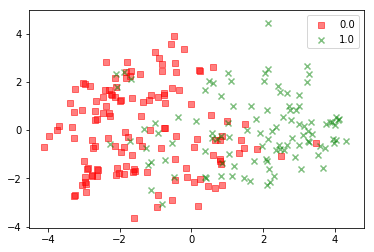

In [38]:
colors = ['r', 'g']
markers = ['s', 'x']

for i, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_pca[y_train == i, 0], X_pca[y_train == i, 1], 
        c=c, marker=m, label=i, alpha=0.5)
    
plt.legend(loc='best')
plt.show()

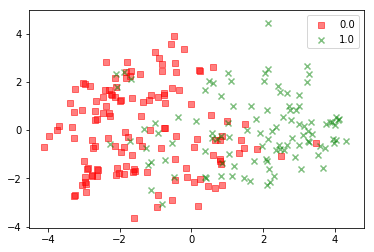

In [39]:
#from itertools import cycle

colors = ['r', 'g', 'b']
markers = ['s', 'x', 'o']

#for i, c, m in zip(np.unique(y_train), cycle(colors), cycle(markers)):
for i, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_pca[y_train == i, 0], X_pca[y_train == i, 1], 
        c=c, marker=m, label=i, alpha=0.5)
    
plt.legend(loc='best')
plt.show()

<center style="color:blue;font-size:30px;font-family:Microsoft JhengHei"> 跟著做10開頭 </center>

# <center> ROC curve: all model</center>

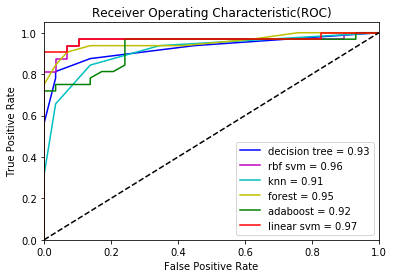

In [40]:
from sklearn.metrics import roc_curve, auc
# decision model
fpr_decision, tpr_decision, thres = roc_curve(y_test,y_predprob_po_decision)
roc_auc_decision = auc(fpr_decision, tpr_decision)
# linear svm model
fpr_linear, tpr_linear, thres = roc_curve(y_test, y_predprob_po_linear)
roc_auc_linear = auc(fpr_linear, tpr_linear)
# rbf svm model
fpr_rbf, tpr_rbf, thres = roc_curve(y_test, y_predprob_po_rbf)
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)
# knn  model
fpr_knn, tpr_knn, thres = roc_curve(y_test, y_predprob_po_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
# random forest model
fpr_forest, tpr_forest, thres = roc_curve(y_test, y_predprob_po_forest)
roc_auc_forest = auc(fpr_forest, tpr_forest)
# adaboost
fpr_ada, tpr_ada, thres = roc_curve(y_test, y_predprob_po_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr_decision, tpr_decision, 'b', label='decision tree = %0.2f'% roc_auc_decision)
plt.plot(fpr_rbf, tpr_rbf, 'm', label='rbf svm = %0.2f'% roc_auc_rbf)
plt.plot(fpr_knn, tpr_knn, 'c', label='knn = %0.2f'% roc_auc_knn)
plt.plot(fpr_forest, tpr_forest, 'y', label='forest = %0.2f'% roc_auc_forest)
plt.plot(fpr_ada, tpr_ada, 'g', label='adaboost = %0.2f'% roc_auc_ada)
plt.plot(fpr_linear, tpr_linear, 'r', label='linear svm = %0.2f'% roc_auc_linear)

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='k', linestyle='--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.show()

# <center> Save and Load model </center>

In [41]:
# save model
import pickle
with open('svm.pkl', 'wb') as f:
    pickle.dump(svm_linear, f)

In [42]:
# load the model
import numpy as np

with open('svm.pkl', 'rb') as f:
    svm = pickle.load(f)
    
test = np.array([[-0.75635158, -0.10203197, -0.04491364,  1.38751461, -0.71832602,
       -0.70272837,  0.70272837, -0.29189346,  2.1821789 , -0.63154092,
       -0.92819096,  0.41803981, -0.41803981, -0.96747093, -0.12964074,
        1.        ,  0.72250438, -0.72250438, -0.91287093,  1.0422125 ,
       -0.26607604,  0.82495791, -0.52955007, -0.36171967, -0.27487371,
        0.882843  , -0.26607604, -0.76948376]])
print(svm.predict(test))

[0.]


<center style="color:blue;font-size:30px;font-family:Microsoft JhengHei"> 跟著做11開頭 </center>
<br>
<center style="color:blue;font-size:20px;font-family:Microsoft JhengHei"> 改成其他classification model </center>

# <center> Sklearn Pipeline </center>

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

#load data
df = pd.read_csv('cleveland.dat', header=None, sep=', ', engine='python')
df.columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
              "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
for i in range(1,5):
    df['num'] = df['num'].replace(i,1)

#處理異常值
df = df.replace('?', np.nan)

#資料切割
X = df.drop('num', axis=1).values
y = df['num'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#類別型特徵列表
catego_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
catego_features_index = []
for str in catego_features:
    catego_features_index.append(df.columns.tolist().index(str))

#PIPELINE setting and training
pipe = Pipeline([('imr', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
                ('ohe', OneHotEncoder(categorical_features=catego_features_index, sparse=False)),
                ('scl', StandardScaler()),
                ('clf', SVC(kernel='rbf', random_state=0, C=2.0))])
pipe.fit(X_train, y_train)

#predict
y_pred = pipe.predict(X_test)

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
# other measurements
precision,recall,fscore,support = precision_recall_fscore_support(y_test, y_pred, average='micro')
print("precision: ", precision)
print("recall: ", recall)
print("fscore: ", fscore)

Misclassified samples: 6
Accuracy: 0.9016
precision:  0.9016393442622951
recall:  0.9016393442622951
fscore:  0.9016393442622952


C:\Users\remon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\remon\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\remon\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_fea

<center style="color:blue;font-size:30px;font-family:Microsoft JhengHei"> 跟著做12開頭 </center>
<br>
<center style="color:blue;font-size:20px;font-family:Microsoft JhengHei"> </center>

# <center> Shuffle cross validation<center>

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

#train svmliner model
svm_linear = SVC(kernel='linear',C=2, random_state=0) 
svm_linear.fit(X_train_std, y_train) # 餵入training data，並訓練出分類器'svm_linear'

#predict
y_pred = svm_linear.predict(X_test_std) #testing data餵入分類器'svm_linear'，得到每筆的預測結果'y_pred'
print('Linear SVM testing result:',y_pred)
print('Misclassified samples: %d' % (y_test != y_pred).sum()) 
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred)) #評估正確性


# complete X_std, y
X_std = np.concatenate((X_train_std, X_test_std),axis=0)
y = np.concatenate((y_train, y_test),axis=0)

from sklearn.model_selection import ShuffleSplit
#cross validation
svm_cross = SVC(kernel='linear',C=2)
shufspl = ShuffleSplit(train_size=0.8,test_size=0.2,n_splits=10)
scores = cross_val_score(svm_cross ,X_std ,y ,cv=shufspl)
print("Cross Validation result scores",scores)
print("(Cross Validation) Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Linear SVM testing result: [0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0
 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1]
Misclassified samples: 5
Accuracy: 0.9180
Cross Validation result scores [0.81967213 0.81967213 0.90163934 0.80327869 0.90163934 0.85245902
 0.85245902 0.81967213 0.73770492 0.7704918 ]
(Cross Validation) Accuracy: 0.8279 (+/- 0.0986)
